# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [23]:
df = pd.read_csv('dataset_clustering.csv')
df.head()

,Ship_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Cluster
0,Container Ship,Critical,12.597558,2062.983982,1030.943616,483832.354540,3
1,Fish Carrier,Good,10.387580,1796.057415,1060.486382,483388.000509,0
2,Container Ship,Fair,20.749747,1648.556685,658.874144,448543.404044,3
3,Bulk Carrier,Fair,21.055102,915.261795,1126.822519,261349.605449,2
4,Fish Carrier,Fair,13.742777,1089.721803,1445.281159,287718.375160,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2471 non-null   object 
 1   Maintenance_Status       2471 non-null   object 
 2   Speed_Over_Ground_knots  2471 non-null   float64
 3   Engine_Power_kW          2471 non-null   float64
 4   Distance_Traveled_nm     2471 non-null   float64
 5   Operational_Cost_USD     2471 non-null   float64
 6   Cluster                  2471 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 135.3+ KB


In [25]:
# Encoding data kategorikal
label_encoder = LabelEncoder()
categorical_columns = ['Ship_Type', 'Maintenance_Status']
 
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Ship_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Cluster
0,1,0,12.597558,2062.983982,1030.943616,483832.354540,3
1,2,2,10.387580,1796.057415,1060.486382,483388.000509,0
2,1,1,20.749747,1648.556685,658.874144,448543.404044,3
3,0,1,21.055102,915.261795,1126.822519,261349.605449,2
4,2,1,13.742777,1089.721803,1445.281159,287718.375160,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1976, 6), y_train=(1976,)
Test set shape: X_test=(495, 6), y_test=(495,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [27]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Pada tahap pelatihan data, digunakan dua algoritma utama, yaitu K-Nearest Neighbors (KNN) dan Random Forest (RF), untuk membangun model klasifikasi. </br>
**Pelatihan Model dengan KNN:**
KNN bekerja dengan membandingkan data baru dengan sejumlah tetangga terdekat (K) dalam data latih.
Hyperparameter K (jumlah tetangga terdekat) disesuaikan menggunakan Grid Search untuk mencari nilai terbaik yang menghasilkan akurasi tertinggi.Model kemudian dilatih menggunakan data latih dengan nilai K yang optimal.

**Pelatihan Model dengan Random Forest:**
Random Forest digunakan untuk membangun beberapa decision tree dari subset acak data latih.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [28]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test)
}

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

data_df = pd.DataFrame(rows)
print(data_df)


                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.917172   0.918901  0.917172  0.916807
1         Random Forest (RF)  1.000000   1.000000  1.000000  1.000000


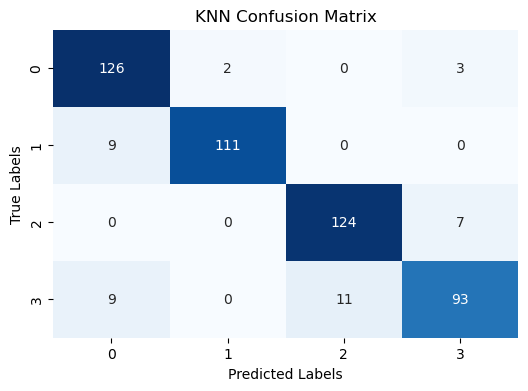

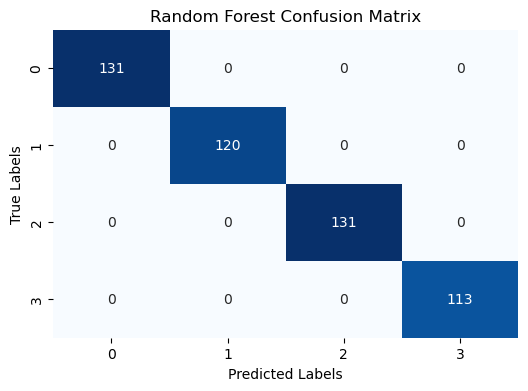

In [29]:
# Plot confusion matrix
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm
    }
    return results

metrics_knn = evaluate_model(knn, X_test, y_test)
metrics_rf = evaluate_model(rf, X_test, y_test)


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(metrics_knn['Confusion Matrix'], 'KNN')
plot_confusion_matrix(metrics_rf['Confusion Matrix'], 'Random Forest')


Algoritma KNN menunjukkan performa yang cukup baik dengan akurasi 91,77%, yang berarti model mampu memprediksi dengan benar sekitar 91,77% dari data uji. Nilai presisi dan recall yang seimbang menunjukkan model tidak cenderung memihak ke satu kelas tertentu dan dapat mengidentifikasi kelas dengan cukup baik, mungkin dapat dioptimalkan lagi akurasinya dengan menggunakan tunning model.Sedangkan algoritma Random Forest memberikan hasil sempurna dengan akurasi, presisi, recall, dan F1-score mencapai 100%. Ini menunjukkan bahwa model memprediksi seluruh data uji dengan benar tanpa kesalahan. Namun, hasil ini perlu dianalisis lebih lanjut karena adanya kemungkinan overfitting, di mana model terlalu menyesuaikan dengan data latih hingga kehilangan kemampuan generalisasi terhadap data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [30]:
# KNN
param_grid = {'n_neighbors': range(1, 50)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best K:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


# Random Forest 
# Memberikan batasan untuk menghindari overfitting
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best RF Accuracy:", rf_grid.best_score_)


Best K: {'n_neighbors': 44}
Best Accuracy: 0.9645761411584196
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best RF Accuracy: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [34]:
# Pelatihan model setelah menggunakan hyperparameter
knn = KNeighborsClassifier(n_neighbors=44)
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=1
)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=150)

In [35]:
# Evaluasi model setelah menggunkan hyperparameter
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test)
}

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

data_df = pd.DataFrame(rows)
print(data_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.961616   0.961681  0.961616  0.961491
1         Random Forest (RF)  0.997980   0.997998  0.997980  0.997980


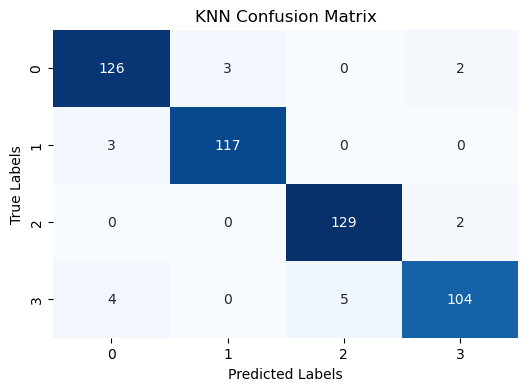

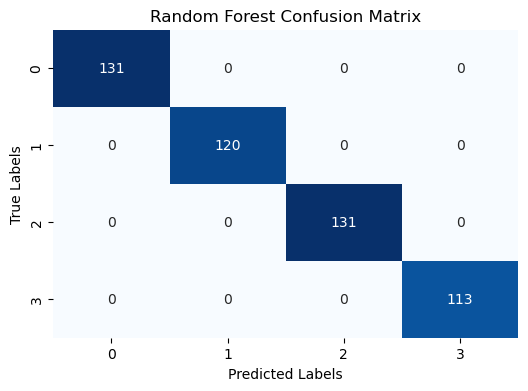

In [36]:
# Plot confusion setelah menggunakan hyperparameter
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm
    }
    return results

metrics_knn = evaluate_model(knn, X_test, y_test)
metrics_rf = evaluate_model(rf, X_test, y_test)

# Fungsi plot Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot Confusion Matrix untuk masing-masing model
plot_confusion_matrix(metrics_knn['Confusion Matrix'], 'KNN')
plot_confusion_matrix(metrics_dt['Confusion Matrix'], 'Random Forest')

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Perbedaan Sebelum dan Sesudah Tuning:
- Sebelum tuning, model KNN memiliki akurasi sebesar 0.917. Setelah tuning, akurasi meningkat menjadi 0.962. Ini menunjukkan bahwa pemilihan jumlah tetangga yang optimal berdampak positif pada performa model.
- Model Random Forest awalnya memiliki akurasi 1.0, yang mengindikasikan overfitting. Setelah tuning, akurasi turun sedikit menjadi 0.997, menunjukkan adanya perbaikan dalam mengurangi overfitting.

2. Identifikasi Kelemahan:
- Random Forest: Meskipun sudah dilakukan tuning, model ini masih menunjukkan tanda-tanda overfitting karena akurasi yang hampir sempurna. Ini bisa disebabkan oleh model yang terlalu kompleks, mungkin karena jumlah pohon keputusan yang digunakan terlalu banyak atau parameter lainnya yang perlu diatur lebih lanjut.
- KNN: Model KNN tampak lebih seimbang setelah tuning, dengan akurasi yang cukup tinggi dan tanpa indikasi overfitting. Hal ini menunjukkan bahwa untuk dataset ini, KNN mampu memberikan hasil yang lebih stabil dibandingkan Random Forest.

3. Kesimpulan dan Rekomendasi:
- Berdasarkan hasil evaluasi, KNN lebih direkomendasikan untuk dataset ini karena performanya yang konsisten dan minim risiko overfitting.
- Jika ingin mengurangi overfitting pada Random Forest, bisa dicoba mengurangi jumlah estimator, meningkatkan nilai min_samples_split, atau menambahkan regularisasi lainnya.